# Twitter

### Pre-processing

TODO
- none

Find the most recent dataset and load it

In [237]:
import pandas as pd
import numpy as np
import os

'''
path = "data"

# get the most recent dataset (ordered by the date in the name)
filelist = os.listdir("data") # get the list of files
matching = [s for s in filelist if "dataset" in s] # filter only by files containing "dataset" in the name
matching.sort(reverse=True)

print(matching[0])

# load the dataset
df = pd.read_csv(path+"/"+matching[0])
df = df.rename(columns={"Text": "text", "Retweet": "retweet", "Likes": "likes", 3: "user_id"})
'''

'\npath = "data"\n\n# get the most recent dataset (ordered by the date in the name)\nfilelist = os.listdir("data") # get the list of files\nmatching = [s for s in filelist if "dataset" in s] # filter only by files containing "dataset" in the name\nmatching.sort(reverse=True)\n\nprint(matching[0])\n\n# load the dataset\ndf = pd.read_csv(path+"/"+matching[0])\ndf = df.rename(columns={"Text": "text", "Retweet": "retweet", "Likes": "likes", 3: "user_id"})\n'

In [238]:
#path = "datasets/619439/"
path = "datasets/joined/"
#path = ""
#df = pd.read_csv(path+"debug_set_614548.csv")
#df = pd.read_csv(path+"debug_set_619439.csv")
#df = pd.read_csv(path+"dataset_pop.csv")
df = pd.read_csv(path+"dataset_pop.csv")
#df = pd.read_csv(path+"dataset_raw.csv")


#path = "datasets/619439/"
#df = pd.concat([df, pd.read_csv(path+"dataset_pop.csv")])
df = df.rename(columns={"text": "X", "pop_level": "y"})
display(df)

,index,X,likes,followers,popularity,y
0,0,i feel so shitty about my body today I want to...,1.0,343.0,0.829554,1
1,4,i want you to make yourself your lunch and let...,3.0,277.0,1.710159,2
2,6,..Wanna go get some lunch?,0.0,329.0,0.417281,0
3,9,hello! not new to edtwt (switched accs) + look...,4.0,14.0,3.127792,2
4,10,20-30 min wait to get a dosa at avrebele mela ...,0.0,98.0,0.489201,0
...,...,...,...,...,...,...
20140,25390,does the 'thinking' time counter on CELTX vs t...,2.0,138.0,1.405926,1
20141,25391,Pinto Beans w/smoked Turkey Wings and cornbrea...,1.0,2088.0,0.575502,1
20142,25393,Back to normal life in Los Angeles means back ...,11.0,6372.0,2.237816,2
20143,25396,At some point a certain brand of skinny fitnes...,7.0,377.0,3.272493,2


#### Clean
Drop duplicates observations

In [239]:
# drop duplicates observations, keeping the first occurrence
df = df.drop_duplicates(subset='X', keep='first')
print(df.shape)
display(df)

(19741, 6)


,index,X,likes,followers,popularity,y
0,0,i feel so shitty about my body today I want to...,1.0,343.0,0.829554,1
1,4,i want you to make yourself your lunch and let...,3.0,277.0,1.710159,2
2,6,..Wanna go get some lunch?,0.0,329.0,0.417281,0
3,9,hello! not new to edtwt (switched accs) + look...,4.0,14.0,3.127792,2
4,10,20-30 min wait to get a dosa at avrebele mela ...,0.0,98.0,0.489201,0
...,...,...,...,...,...,...
20140,25390,does the 'thinking' time counter on CELTX vs t...,2.0,138.0,1.405926,1
20141,25391,Pinto Beans w/smoked Turkey Wings and cornbrea...,1.0,2088.0,0.575502,1
20142,25393,Back to normal life in Los Angeles means back ...,11.0,6372.0,2.237816,2
20143,25396,At some point a certain brand of skinny fitnes...,7.0,377.0,3.272493,2


Generate response variable

### Training Test Split

In [240]:
from sklearn.model_selection import train_test_split

sec_col = 'popularity'
y_col = ['y', sec_col] ####
####y_col = ['y'] ####
X_cols = df.columns
X_cols = X_cols.drop(y_col)

#X_cols = X_cols.drop('likes')
#X_cols = X_cols.drop('followers')
#X_cols = X_cols.drop('impressions')
#X_cols = X_cols.drop('popularity') ####

print(X_cols)

# split data
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:,X_cols], df.loc[:,y_col], test_size=0.2, random_state=0, shuffle=True, stratify=df.loc[:,'y'])

# REVIEW THIS:
X_train = X_train['X']
X_test = X_test['X']

# backup
X_train_bak = X_train
X_test_bak = X_test

y_train_reg = y_train[sec_col]
y_test_reg = y_test[sec_col]

y_train_clf = y_train['y']
y_test_clf = y_test['y']

display(X_train)
display(y_train)

Index(['index', 'X', 'likes', 'followers'], dtype='object')


203      What is the keto diet:\n\nThe ketogenic diet o...
16767    I just love how Mexican food is just like “but...
1529     🤍 01/05 calories\n⁃breakfast: +450\n⁃lunch: +5...
11011                                  I love yakisoba bun
9673     I made chocolate chip cookies &amp; didn’t thi...
                               ...                        
15838    She fell in love with smashing a plátano she s...
8068     new comfort food i could eat everyday unlocked...
19431    // Doing hospitality and one of the people I a...
4472          I was late from lunch reading this damn book
3355     I have a list of errands to run but I also wan...
Name: X, Length: 15792, dtype: object

,y,popularity
203,0,0.470836
16767,0,0.473586
1529,1,1.239854
11011,0,0.466117
9673,1,0.954954
...,...,...
15838,0,0.436263
8068,0,0.432671
19431,0,0.426268
4472,0,0.413044


In [241]:
# SET CLASSIFICATION
y_train = y_train_clf
y_test = y_test_clf

#### Stemming
We can further improve our bag-of-words pre-processing using a normalization technique called stemming.
The idea is to reduce each word to its stem, using the stemming algorithm (rule-based heuristic).
For example a stemmer reduce words like "climber", "climbed" and "climbing" to "climb".

The Natural Language Toolkit for Python (NLTK, http://www.nltk.org) implements the Snowball stemming algorithm.

#### Bag-of-Words

Is used the scikit-learn implementation of bag of word using the CountVectorizer class.
It take an array of text as input and return a bag-of-words model.

##### Less frequently words
To lower the dimension we can clean the words that appears less frequently, is used the "min_df" to set the minimum number of documents that the word needs to appear in.



In [242]:
# prepare tokenization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# create a function to 
def tokenizer_snowballStemmer(text):
    return [stemmer.stem(word) for word in text.split()]

tokenizer_snowballStemmer("The pink sweater fit her perfectly") # test

['the', 'pink', 'sweater', 'fit', 'her', 'perfect']

Bag of word

In [243]:
from sklearn.feature_extraction.text import CountVectorizer

def prep_bagofword(X_train, X_test):
    count = CountVectorizer(tokenizer = tokenizer_snowballStemmer, min_df=5) # use tokenizer function
    count.fit(X_train) # generate Bag-of-words

    #print("Vocabulary size using stemming: {}". format(len(count.vocabulary_)))
    #print("Vocabulary content:\n {}".format(count.vocabulary_))

    # apply transformation to the data
    X_train = count.transform(X_train)
    print("X_train: {}".format(X_train.shape))

    X_test = count.transform(X_test)
    print("X_test: {}".format(X_test.shape))
    
    feature_names = np.array(count.get_feature_names())
    
    return X_train, X_test, feature_names


Better use bag of word + TF-IDF

REFs 
https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

In [244]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time

def prep_bagofword_tfidf(X_train, X_test):
    vectorizer = TfidfVectorizer(
        tokenizer = tokenizer_snowballStemmer,
        #max_df=0.01,
        min_df=5,
        #ngram_range=(1,5),
        stop_words="english")

    t0 = time.time()
    vectorizer.fit(X_train)
    X_train = vectorizer.transform(X_train)
    print(f"vectorization done in {time.time() - t0:.3f} s")

    print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
    print(f"{X_train.nnz / np.prod(X_train.shape):.3f}")

    #print("Vocabulary size using stemming: {}". format(len(count.vocabulary_)))
    #print("Vocabulary content:\n {}".format(vectorizer.vocabulary_))

    # apply transformation to the tesr
    X_test = vectorizer.transform(X_test)
    print("X_test: {}".format(X_test.shape))

    feature_names = np.array(vectorizer.get_feature_names())
    
    return X_train, X_test, features_names

Main preprocessing function

In [245]:
# update the variables
#X_train = X_train_bak
#X_test = X_test_bak

# select steps to apply
#X_train, X_test, features_names = prep_bagofword(X_train, X_test)

# update the variables
X_train = X_train_bak
X_test = X_test_bak

X_train, X_test, features_names = prep_bagofword_tfidf(X_train, X_test)

# in case of classification
target_names = [0, 1 ,2]
display(target_names)

/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi

vectorization done in 6.751 s
n_samples: 15792, n_features: 4244
0.002
X_test: (3949, 4244)


/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[0, 1, 2]

### GridSearchCV

In [246]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':('100', '200'), 'C':[1, 10]}
clf = make_pipeline(StandardScaler(), 
                    GridSearchCV(LogisticRegression(),
                                 param_grid={'logisticregression__C': [0.1, 10.]},
                                 cv=2,
                                 refit=True))

clf.fit()
clf.predict()
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)


sorted(clf.cv_results_.keys())
'''

"\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\nparameters = {'n_estimators':('100', '200'), 'C':[1, 10]}\nclf = make_pipeline(StandardScaler(), \n                    GridSearchCV(LogisticRegression(),\n                                 param_grid={'logisticregression__C': [0.1, 10.]},\n                                 cv=2,\n                                 refit=True))\n\nclf.fit()\nclf.predict()\nclf = GridSearchCV(clf, parameters)\nclf.fit(X_train, y_train)\n\n\nsorted(clf.cv_results_.keys())\n"

### Modeling

In [247]:
from sklearn.ensemble import RandomForestClassifier

def model_randomforest(X_train, y_train):
    # fit a Random Forest model
    clf_empty = RandomForestClassifier(n_estimators=100)
    clf_fitted = clf_empty.fit(X_train, y_train) 
    return clf_empty, clf_fitted

Check the model performance using cross validation (on the training set) and show the accuracy results.

In [248]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def eval_cv_classification(clf, X_train, y_train):
    # plot CV results
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='balanced_accuracy')
    display("CROSS VALIDATION")
    display("Cross Validation scores")
    i=1
    for a in scores:
        display("Accuracy cv=" + str(i) + ": " + str(round(a*100, 2)))
        i = i+1
    acc_mean = round(scores.mean(),2)*100
    display("Accuracy MEAN: "+str(acc_mean))
    return scores.mean()

In [249]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score

def eval_pred_classification(clf, X_test, y_test):
    display("TEST SET")
    # results on test set
    predictions = clf.predict(X_test)
    test_accuracy = balanced_accuracy_score(predictions, y_test)
    display("Test set accuracy: " + str(round(test_accuracy*100, 2)))
    display(confusion_matrix(predictions, y_test)) # display confusion matrix

    # results on test set
    predictions = clf.predict(X_test)
    test_accuracy = balanced_accuracy_score(predictions, y_test)
    display("Test set accuracy: " + str(round(test_accuracy*100, 2)))

    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()

    fig = disp.ax_.get_figure()
    fig.set_figwidth(2)
    fig.set_figheight(2)

    plt.title("Test set results")
    plt.show()

'Cross Validation scores'

'Accuracy cv=1: 39.12'

'Accuracy cv=2: 39.01'

'Accuracy cv=3: 37.73'

'Accuracy cv=4: 38.6'

'Accuracy cv=5: 37.73'

'Accuracy MEAN: 38.0'

'Test set accuracy: 41.51'

array([[1351,  831,  610],
       [ 240,  209,  170],
       [ 147,  163,  228]])

'Test set accuracy: 41.51'

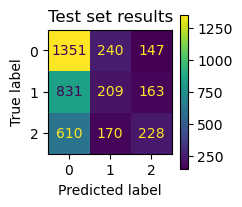

In [250]:
# get model
clf_empty, clf_fitted = model_randomforest(X_train, y_train)

# Cross Validation
eval_cv_classification(clf_empty, X_train, y_train)

# validation set
eval_pred_classification(clf_fitted, X_test, y_test)

## Benchmarking

Benchmarking function

In [251]:
from sklearn.utils.extmath import density
from sklearn import metrics

def benchmark(clf, custom_name=False):
    
    score_cv = eval_cv_classification(clf, X_train, y_train)
    
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - t0
    print(f"train time: {train_time:.3}s")

    t0 = time.time()
    pred = clf.predict(X_test)
    test_time = time.time() - t0
    print(f"test time:  {test_time:.3}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")

    if hasattr(clf, "coef_"):
        print(f"dimensionality: {clf.coef_.shape[1]}")
        print(f"density: {density(clf.coef_)}")
        print()

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
        
    return clf_descr, score, train_time, test_time, score_cv

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

results = []
for clf, name in (
    (LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    # L2 penalty Linear SVC
    (LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    # Sparse naive Bayes classifier
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

Logistic Regression


'Cross Validation scores'

'Accuracy cv=1: 38.9'

'Accuracy cv=2: 40.31'

'Accuracy cv=3: 39.67'

'Accuracy cv=4: 40.11'

'Accuracy cv=5: 38.68'

'Accuracy MEAN: 40.0'

________________________________________________________________________________
Training: 
LogisticRegression(C=5, max_iter=1000)
train time: 2.33s
test time:  0.000593s
accuracy:   0.427
dimensionality: 4244
density: 1.0


kNN


/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

'Cross Validation scores'

'Accuracy cv=1: 33.47'

'Accuracy cv=2: 33.92'

'Accuracy cv=3: 33.67'

'Accuracy cv=4: 33.3'

'Accuracy cv=5: 33.69'

'Accuracy MEAN: 34.0'

________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=100)
train time: 0.00219s


/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


test time:  1.58s
accuracy:   0.438

Random Forest


'Cross Validation scores'

'Accuracy cv=1: 39.26'

'Accuracy cv=2: 38.64'

'Accuracy cv=3: 37.76'

'Accuracy cv=4: 38.24'

'Accuracy cv=5: 38.23'

'Accuracy MEAN: 38.0'

________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 10.8s
test time:  0.496s
accuracy:   0.45

Linear SVC


'Cross Validation scores'

'Accuracy cv=1: 39.25'

'Accuracy cv=2: 39.97'

'Accuracy cv=3: 38.52'

'Accuracy cv=4: 39.6'

'Accuracy cv=5: 37.88'

'Accuracy MEAN: 39.0'

________________________________________________________________________________
Training: 
LinearSVC(C=0.1, dual=False)
train time: 0.0935s
test time:  0.000433s
accuracy:   0.448
dimensionality: 4244
density: 1.0


Complement naive Bayes


'Cross Validation scores'

'Accuracy cv=1: 38.95'

'Accuracy cv=2: 40.9'

'Accuracy cv=3: 42.17'

'Accuracy cv=4: 41.23'

'Accuracy cv=5: 39.9'

'Accuracy MEAN: 41.0'

________________________________________________________________________________
Training: 
ComplementNB(alpha=0.1)
train time: 0.0043s
test time:  0.000397s
accuracy:   0.423
dimensionality: 4244
density: 1.0




/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


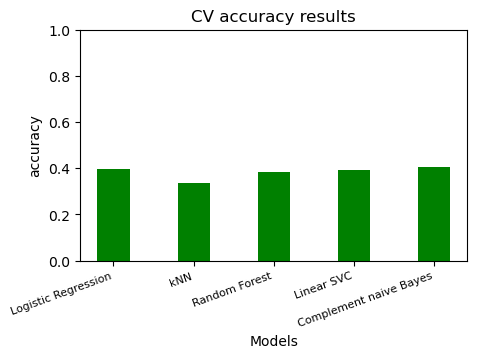

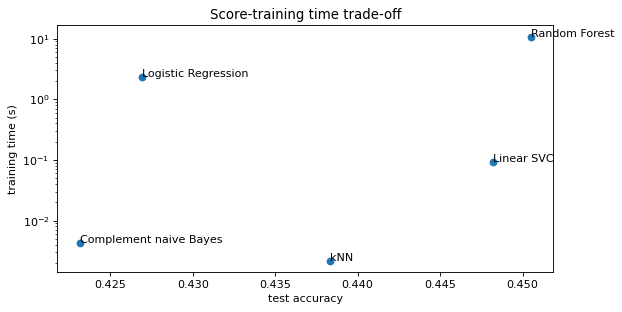

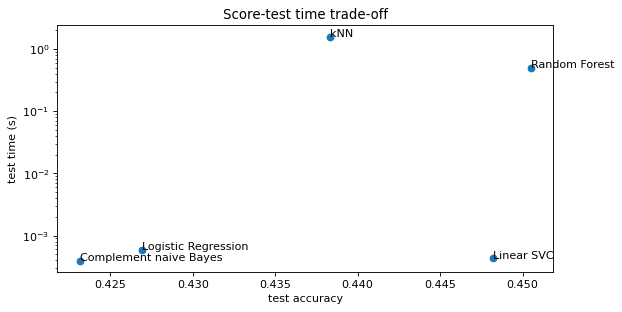

In [253]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(5)]

clf_names, score, training_time, test_time, score_cv = results
training_time = np.array(training_time)
test_time = np.array(test_time)

# accuracy cv

fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
ax = plt.bar(clf_names, score_cv, color ='green', width = 0.4)

plt.xticks(ha='right', rotation=20, fontsize=8)
plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("accuracy")
plt.title("CV accuracy results")
plt.show()
    
# accuracy validation
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=80)
ax1.scatter(score, training_time)
ax1.set(
    title="Score-training time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="training time (s)",
)
fig, ax2 = plt.subplots(figsize=(8, 4), dpi=80)
ax2.scatter(score, test_time)
ax2.set(
    title="Score-test time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="test time (s)",
)

for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (score[i], training_time[i]))
    ax2.annotate(txt, (score[i], test_time[i]))

'Test set accuracy: 44.01'

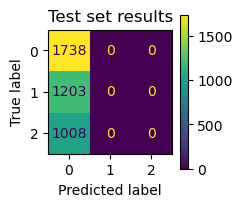

In [254]:
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# results on test set
predictions = dummy_clf.predict(X_test)
test_accuracy = accuracy_score(predictions, y_test)
display("Test set accuracy: " + str(round(test_accuracy*100, 2)))

cm = confusion_matrix(y_test, predictions, labels=dummy_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dummy_clf.classes_)
disp.plot()

fig = disp.ax_.get_figure()
fig.set_figwidth(2)
fig.set_figheight(2)

plt.title("Test set results")
plt.show()

## Regression

In [255]:
y_train = y_train_reg
y_test = y_test_reg

In [256]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

# plot CV results
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
display("Cross Validation scores on popularity")
i=1
for a in scores:
    display("R^2 cv=" + str(i) + ": " + str(round(a*100, 2)))
    i = i+1

display("R^2 MEAN: "+str(round(scores.mean(),2)*100))

'Cross Validation scores on popularity'

'R^2 cv=1: -3.49'

'R^2 cv=2: -341.96'

'R^2 cv=3: -13.23'

'R^2 cv=4: -1031.56'

'R^2 cv=5: -300.41'

'R^2 MEAN: -338.0'

In [257]:
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVC
#clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
#display(clf.score(X_test, y_test))

clf = DummyRegressor(strategy="mean")
clf.fit(X_train, y_train)

display(clf.score(X_test, y_test))

-0.0004378813628529432